In [1]:
import pickle 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

In [2]:
pickle_in = open('cleaned_df.pickle','rb')
df = pickle.load(pickle_in) #loading cleaned dataframe

In [3]:
df.head()

,Product.Name,Category,Brand,Seller,Price,Fees,Net,Weight,Rating,Rank,Sellers,LQS,Sales,Revenue,Date,Rated,X of Rating
ASIN,,,,,,,,,,,,,,,,,
B06XFMZX5W,"""Beauty and the Beast"" Rose Kit, Red Silk Rose...","Arts, Crafts & Sewing",Louis Garden,Louis Garden,25.99,8.65,17.34,2.1 lbs,4.1 (290),1942.0,3.0,47.0,457.0,11877.43,2018-10-07 00:00:00,4.1,290.0
B0756PZL6G,#11 Hobby Blades - Precision Cut SK5 Carbon St...,"Arts, Crafts & Sewing",Unknown,Selective 21,10.89,4.04,6.85,0.2 lbs,4.4 (20),2106.0,1.0,41.0,564.0,6141.96,2018-10-07 00:00:00,4.4,20.0
B00FBFUB3U,#3 4KG Foundry Clay Graphite Crucibles Cup Fur...,"Arts, Crafts & Sewing",Rosenthal Collection,Five Star Savings,19.95,7.84,12.11,2.35 lbs,4.2 (172),8115.0,1.0,35.0,295.0,5885.25,2018-10-07 00:00:00,4.2,172.0
B01M6XQIXE,"(10) 12"" x 12"" Sheets - Oracal 651 Black Adhes...","Arts, Crafts & Sewing",ORACAL,Vinyl One,12.99,5.14,7.85,0.4 lbs,4.3 (38),2352.0,2.0,65.0,383.0,4975.17,2018-10-07 00:00:00,4.3,38.0
B01MAXJ4KI,"(10) 12"" x 12"" Sheets - Oracal 651 Black Adhes...","Arts, Crafts & Sewing",ORACAL,Vinyl One,12.99,5.14,7.85,0.6 lbs,4.3 (38),2344.0,2.0,45.0,377.0,4897.23,2018-10-07 00:00:00,4.3,38.0


In [4]:
df_description = df['Product.Name']

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

vectorizer = TfidfVectorizer() #instantiating Text Vectorizer
ks = np.arange(2,15)  #range of k-values
df_matrix = vectorizer.fit_transform(df_description)  #creating spares matrix from product descriptions
inertia = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_matrix)
    inertia.append(model.inertia_)

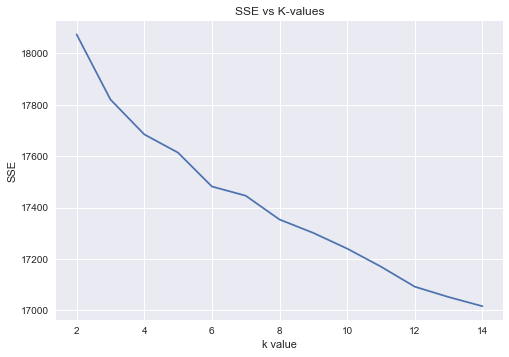

In [49]:
#ploting a chart showing SS for each K
plt.plot(ks,inertia)
plt.xlabel('k value')
plt.ylabel('SSE')
plt.title('SSE vs K-values')
plt.show()

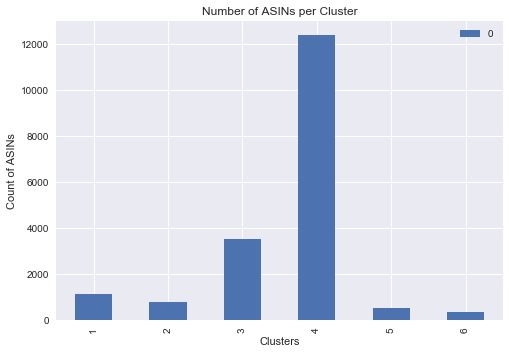

In [46]:
#find the number of points per cluster under cluster=7
model = KMeans(n_clusters=6).fit(df_matrix)

Npercluster = np.bincount(model.labels_)
nindex = np.arange(1,7)
clusterCount = pd.DataFrame(Npercluster,index=nindex)

clusterCount.plot(kind='bar')
plt.xlabel('Clusters')
plt.ylabel('Count of ASINs')
plt.title('Number of ASINs per Cluster')
plt.show()

## Need to find features that characterize the products vs sales numbers.  

In [28]:
vectorizer.fit_transform(df_description.iloc[0])

TypeError: fit_transform() missing 1 required positional argument: 'raw_documents'

In [ ]:
#importing KMeans
from sklearn.cluster import KMeans
import numpy as np

